<div style="text-align:center;padding:20px;color:Seashell;font-size:48px;font-family:Roboto Condensed;background-color: DarkGoldenrod;margin:0;overflow:hidden;border:4px solid Seashell;border-radius:10px;">S04E11 😊😰 Mental Health Binary-Class</div>

<table style="width:100%;table-layout:fixed;margin:0;overflow:hidden;text-align:center;font-family:Roboto Condensed;font-size:18px"><tr>
<th style="width:12.5%;background-color:Seashell;color:DarkGoldenrod;border:2px solid DarkGoldenrod;text-align:center;">Task</th>
<th style="width:12.5%;background-color:Seashell;color:DarkGoldenrod;border:2px solid DarkGoldenrod;text-align:center;">Method</th>
<th style="width:12.5%;background-color:Seashell;color:DarkGoldenrod;border:2px solid DarkGoldenrod;text-align:center;">Target</th>
<th style="width:12.5%;background-color:Seashell;color:DarkGoldenrod;border:2px solid DarkGoldenrod;text-align:center;">Feature</th>
<th style="width:12.5%;background-color:Seashell;color:DarkGoldenrod;border:2px solid DarkGoldenrod;text-align:center;">Train</th>
<th style="width:12.5%;background-color:Seashell;color:DarkGoldenrod;border:2px solid DarkGoldenrod;text-align:center;">Test</th>
<th style="width:12.5%;background-color:Seashell;color:DarkGoldenrod;border:2px solid DarkGoldenrod;text-align:center;">Metric</th>
<th style="width:12.5%;background-color:Seashell;color:DarkGoldenrod;border:2px solid DarkGoldenrod;text-align:center;">Result</th></tr><tr>
<th style="border: 2px solid DarkGoldenrod; text-align: center;">BinaryClass </td>
<th style="border: 2px solid DarkGoldenrod; text-align: center;">LGB+XGB     </td>
<th style="border: 2px solid DarkGoldenrod; text-align: center;">0/1         </td>
<th style="border: 2px solid DarkGoldenrod; text-align: center;">12          </td>
<th style="border: 2px solid DarkGoldenrod; text-align: center;">165034      </td>
<th style="border: 2px solid DarkGoldenrod; text-align: center;">110023      </td>
<th style="border: 2px solid DarkGoldenrod; text-align: center;">Accuracy    </td>
<th style="border: 2px solid DarkGoldenrod; text-align: center;">94%       </td></tr></table>

## <div style="text-align:center;padding:10px;color:DarkGoldenrod;font-size:32px;font-family:Roboto Condensed;background-color:Seashell;margin:0;overflow:hidden;border:2px solid DarkGoldenrod;border-radius:5px;">01 - Data - Importing</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, f1_score, log_loss, accuracy_score, roc_auc_score
from itertools import combinations

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier, early_stopping
from xgboost import XGBClassifier

import optuna
from optuna.samplers import TPESampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc = {'axes.facecolor': '#f8f2e4', 'figure.facecolor': '#f8f2e4', 'font.family': 'serif',
        'axes.edgecolor': '#595959', 'axes.labelcolor': '#595959', 'axes.titlecolor': '#595959',
        'xtick.color': '#595959', 'ytick.color': '#595959', 'grid.color': '#595959', 'grid.alpha': 0.1})

styles = [{'selector': 'th, td', 'props': [('width', '50px'), ('text-align', 'center')]}]

palette = sns.color_palette('colorblind')

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')

train.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)

print('train',train.shape)
print('test',test.shape)
print('sub',sub.shape)

train (140700, 19)
test (93800, 18)
sub (93800, 2)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Study Satisfaction                     27897 non-null   float64
 10  Job Satisfaction                       112790 non-null  

## <div style="text-align:center;padding:10px;color:DarkGoldenrod;font-size:32px;font-family:Roboto Condensed;background-color:Seashell;margin:0;overflow:DarkGoldenrod;border:2px solid DarkGoldenrod;border-radius:5px;">02 - Data - Description</div>

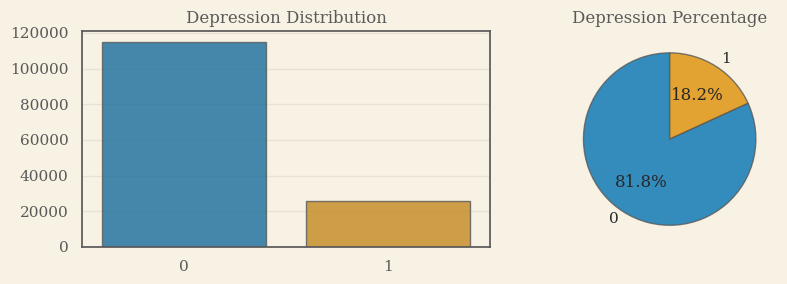

In [5]:
target = 'Depression'

target_counts = train[target].value_counts().reset_index()
target_counts.columns = [target, 'Count']

fig, axes = plt.subplots(1, 2, figsize=(9, 3))

sns.barplot(data=target_counts, x=target, y='Count', ax=axes[0], palette=palette, edgecolor='#595959', alpha=0.8)
axes[0].set_title(f'{target} Distribution')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

axes[1].pie(target_counts['Count'], labels=target_counts[target], autopct='%1.1f%%',
            colors=palette, startangle=90, wedgeprops={'edgecolor': '#595959', 'alpha': 0.8})
axes[1].set_title(f'{target} Percentage')

plt.tight_layout()
plt.show()

In [6]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())
print(train.duplicated().sum())
print(test.duplicated().sum())

430876
287291
0
0


In [7]:
def summary(train):
    print(f'Shape: {train.shape}')
    df = pd.DataFrame()
    numeric_cols = train.select_dtypes(include=[np.number])
    desc = numeric_cols.describe().transpose()
    df['Type'] = train.dtypes
    df['Mean'] = desc['mean'].round(1)
    df['Unique'] = train.nunique().values
    df['Null'] = train.isnull().sum().values
    df['Skew'] = numeric_cols.skew().round(1)

    for col in numeric_cols.columns:
        Q1 = desc.loc[col, '25%']
        Q3 = desc.loc[col, '75%']
        IQR = Q3 - Q1
        df.loc[col, '<6IQR'] = (numeric_cols[col] < Q1 - 6 * IQR).sum()
        df.loc[col, '<3IQR'] = (numeric_cols[col] < Q1 - 3 * IQR).sum()
        df.loc[col, '>3IQR'] = (numeric_cols[col] > Q3 + 3 * IQR).sum()
        df.loc[col, '>6IQR'] = (numeric_cols[col] > Q3 + 6 * IQR).sum()
    df['Min'] = desc['min'].round(1)
    df['Median'] = desc['50%'].round(1)
    df['Max'] = desc['max'].round(1)
    return df

In [8]:
column_mapping = {
    'Family History of Mental Illness': 'Mental History',
    'Have you ever had suicidal thoughts ?': 'Suicide'
}
train.rename(columns=column_mapping, inplace=True)
test.rename(columns=column_mapping, inplace=True)

In [9]:
def combine(df):
    df['Pressure'] = df.apply(
        lambda row: row['Academic Pressure'] 
        if row['Working Professional or Student'] == 'Student' 
        else row['Work Pressure'], axis=1
    )

    df['Satisfaction'] = df.apply(
        lambda row: row['Study Satisfaction'] 
        if row['Working Professional or Student'] == 'Student' 
        else row['Job Satisfaction'], axis=1
    )

    df['Profession'] = df.apply(
        lambda row: row['Working Professional or Student'] 
        if row['Working Professional or Student'] == 'Student' 
        else row['Profession'], axis=1
    )
    
    df.drop(['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Working Professional or Student'], axis=1, inplace=True)
    return df

train = combine(train)
test = combine(test)

In [10]:
summary(train.drop([target], axis=1)).sort_values(by='Unique', ascending=True).style.format(
    precision=1).background_gradient(cmap='Oranges').set_table_styles(styles)

Shape: (140700, 15)


,Type,Mean,Unique,Null,Skew,<6IQR,<3IQR,>3IQR,>6IQR,Min,Median,Max
Gender,object,nan,2,0,nan,nan,nan,nan,nan,nan,nan,nan
Suicide,object,nan,2,0,nan,nan,nan,nan,nan,nan,nan,nan
Mental History,object,nan,2,0,nan,nan,nan,nan,nan,nan,nan,nan
Pressure,float64,3.0,5,29,-0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0
Financial Stress,float64,3.0,5,4,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0
Satisfaction,float64,3.0,5,27,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0
Work/Study Hours,float64,6.3,13,0,-0.1,0.0,0.0,0.0,0.0,0.0,6.0,12.0
Dietary Habits,object,nan,23,4,nan,nan,nan,nan,nan,nan,nan,nan
Sleep Duration,object,nan,36,0,nan,nan,nan,nan,nan,nan,nan,nan
Age,float64,40.4,43,0,-0.2,0.0,0.0,0.0,0.0,18.0,42.0,60.0


In [11]:
summary(test).sort_values(by='Unique', ascending=True).style.format(
    precision=1).background_gradient(cmap='Oranges').set_table_styles(styles)

Shape: (93800, 15)


,Type,Mean,Unique,Null,Skew,<6IQR,<3IQR,>3IQR,>6IQR,Min,Median,Max
Gender,object,nan,2,0,nan,nan,nan,nan,nan,nan,nan,nan
Suicide,object,nan,2,0,nan,nan,nan,nan,nan,nan,nan,nan
Mental History,object,nan,2,0,nan,nan,nan,nan,nan,nan,nan,nan
Pressure,float64,3.0,5,17,-0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0
Financial Stress,float64,3.0,5,0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0
Satisfaction,float64,3.0,5,17,0.1,0.0,0.0,0.0,0.0,1.0,3.0,5.0
Work/Study Hours,float64,6.2,13,0,-0.1,0.0,0.0,0.0,0.0,0.0,6.0,12.0
Dietary Habits,object,nan,22,5,nan,nan,nan,nan,nan,nan,nan,nan
Sleep Duration,object,nan,31,0,nan,nan,nan,nan,nan,nan,nan,nan
Age,float64,40.3,44,0,-0.2,0.0,0.0,0.0,0.0,18.0,42.0,60.0


## <div style="text-align:center;padding:10px;color:DarkGoldenrod;font-size:32px;font-family:Roboto Condensed;background-color:Seashell;margin:0;overflow:hidden;border:2px solid DarkGoldenrod;border-radius:5px;">03 - Distribution - Category</div>

In [12]:
train1 = train.copy()
test1 = test.copy()

In [13]:
df = pd.concat([train1, test1], axis=0)

cat_features = df.columns[train1.nunique() <= 100].drop([target]).tolist()
cat_features

['Gender',
 'Age',
 'City',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Suicide',
 'Work/Study Hours',
 'Financial Stress',
 'Mental History',
 'Pressure',
 'Satisfaction']

In [14]:
def count(df, col, target, top_n=40, decimals=2):

    result = pd.DataFrame({'Count': df[col].value_counts(),
        'Ratio': df.groupby(col)[target].mean().round(decimals)
    }).sort_values(by='Count', ascending=False).head(top_n)
    return result

In [15]:
count(train1, 'City', target)

,Count,Ratio
City,,
Kalyan,6591,0.20
Patna,5924,0.16
Vasai-Virar,5765,0.20
Kolkata,5689,0.17
Ahmedabad,5613,0.22
Meerut,5528,0.13
Ludhiana,5226,0.19
Pune,5210,0.16
Rajkot,5207,0.17


In [16]:
count(train1, 'Profession', target)

,Count,Ratio
Profession,,
Student,27905,0.59
Teacher,24900,0.06
Content Writer,7812,0.02
Architect,4362,0.10
Consultant,4229,0.05
HR Manager,4022,0.11
Pharmacist,3891,0.03
Doctor,3253,0.05
Business Analyst,3161,0.06


In [17]:
count(train1, 'Sleep Duration', target)

,Count,Ratio
Sleep Duration,,
Less than 5 hours,38784,0.23
7-8 hours,36969,0.18
More than 8 hours,32726,0.14
5-6 hours,32142,0.17
3-4 hours,12,0.08
6-7 hours,8,0.25
4-5 hours,7,0.14
4-6 hours,5,0.20
2-3 hours,5,0.20


In [18]:
count(train1, 'Dietary Habits', target)

,Count,Ratio
Dietary Habits,,
Moderate,49705,0.17
Unhealthy,46227,0.26
Healthy,44741,0.12
No,2,0.00
More Healthy,2,0.00
Yes,2,0.50
1.0,1,1.00
Gender,1,0.00
Electrician,1,0.00


In [19]:
count(train1, 'Degree', target)

,Count,Ratio
Degree,,
Class 12,14729,0.51
B.Ed,11691,0.13
B.Arch,8742,0.16
B.Com,8113,0.16
B.Pharm,5856,0.12
BCA,5739,0.20
M.Ed,5668,0.10
MCA,5234,0.15
BBA,5030,0.13


In [20]:
features = ['City', 'Profession', 'Sleep Duration','Dietary Habits','Degree',]

for col in features:
    
    value_counts = df[col].value_counts()
    
    to_replace = value_counts[value_counts < 100].index.tolist()
    
    df[col] = df[col].replace(to_replace, np.nan)

In [21]:
df.isnull().sum()

Name                     0
Gender                   0
Age                      0
City                   148
Profession           14726
CGPA                187836
Sleep Duration         133
Dietary Habits          57
Degree                 202
Suicide                  0
Work/Study Hours         0
Financial Stress         4
Mental History           0
Depression           93800
Pressure                46
Satisfaction            44
dtype: int64

In [22]:
for col in ['City', 'Sleep Duration', 'Financial Stress', 'Pressure', 'Satisfaction', 'Dietary Habits', 'Degree']:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

for col in ['Profession']:
    df[col].fillna('other', inplace=True)

for col in ['CGPA']:
    df[col].fillna(0, inplace=True)

In [23]:
def cat_plot(train, cat_features, target):
    num_rows = len(cat_features)
    fig, axes = plt.subplots(num_rows, 2, figsize=(9, 2.5 * num_rows))
    axes = axes.reshape(-1, 2)

    for i, feature in enumerate(cat_features):

        sns.countplot(x=train[feature], ax=axes[i][0], color=palette[0], edgecolor='black', alpha=0.8)
        axes[i][0].set_title(f'{feature}')
        axes[i][0].set_xlabel('')
        axes[i][0].set_ylabel('')
        axes[i][0].tick_params(labelsize=8)

        cross = pd.crosstab(train[feature], train[target], normalize='index')
        cross.plot(kind='bar', stacked=True, ax=axes[i][1], color=palette, edgecolor='black', alpha=0.8)
        axes[i][1].set_title('Target')
        axes[i][1].set_xlabel('')
        axes[i][1].set_ylabel('')
        axes[i][1].tick_params(rotation=0, labelsize=8)
        axes[i][1].set_ylim(0, 1.3)
        axes[i][1].legend(loc='upper center', ncol=4, fontsize=8)

    plt.tight_layout()
    plt.show()

In [24]:
train1 = df.iloc[:len(train)]
test1 = df.iloc[len(train):].drop([target], axis=1)

print(train1.isnull().sum().sum())
print(test1.isnull().sum().sum())

0
0


In [25]:
cat_features = df.columns[train1.nunique() <= 15].drop([target]).tolist()
cat_features

['Gender',
 'Sleep Duration',
 'Dietary Habits',
 'Suicide',
 'Work/Study Hours',
 'Financial Stress',
 'Mental History',
 'Pressure',
 'Satisfaction']

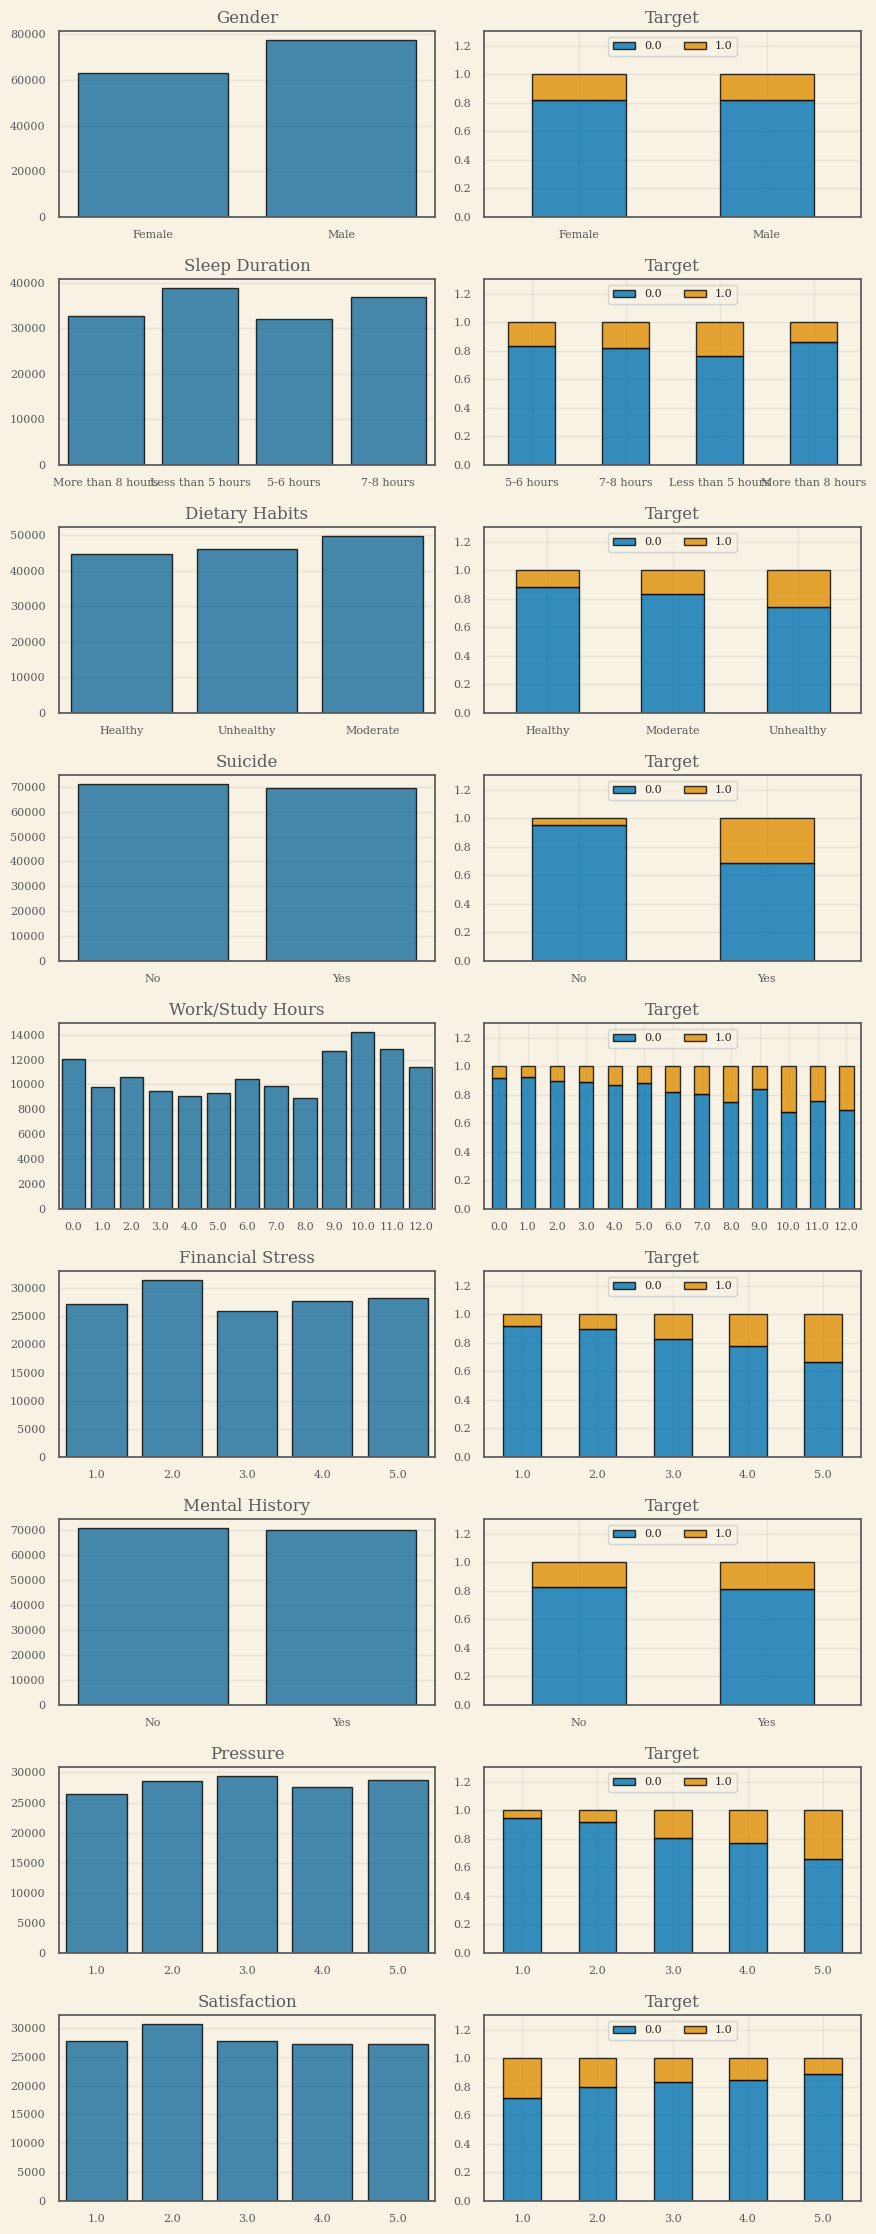

In [26]:
cat_plot(train1, cat_features, target)

## <div style="text-align:center;padding:10px;color:DarkGoldenrod;font-size:32px;font-family:Roboto Condensed;background-color:Seashell;margin:0;overflow:hidden;border:2px solid DarkGoldenrod;border-radius:5px;">04 - Distribution - Numeric</div>

In [27]:
def num_plot(train, num_features, target):
    num_rows = len(num_features)
    fig, axes = plt.subplots(num_rows, 2, figsize=(9, 2.5 * num_rows))
    axes = axes.reshape(-1, 2)

    for i, feature in enumerate(num_features):
        bins = pd.cut(train[feature], bins=15, precision=0)
        labels = [f'{interval.right}' for interval in bins.cat.categories]
        bin = train.copy()
        bin[feature] = pd.cut(train[feature], bins=15, labels=labels)

        sns.countplot(x=bin[feature], ax=axes[i][0], color=palette[0],
                      edgecolor='black', alpha=0.8)
        axes[i][0].set_title(f'{feature}')
        axes[i][0].set_xlabel(''), axes[i][0].set_ylabel(''), axes[i][0].tick_params(labelsize=9)

        cross = pd.crosstab(bin[feature], bin[target], normalize='index')
        cross.plot(kind='bar', stacked=True, ax=axes[i][1], color=palette,
                   edgecolor='black', alpha=0.8)
        axes[i][1].set_title('Target')
        axes[i][1].set_xlabel(''), axes[i][1].set_ylabel('')
        axes[i][1].tick_params(axis='x', rotation=0), axes[i][1].tick_params(labelsize=9)
        axes[i][1].set_ylim(0, 1.3)
        axes[i][1].legend(loc='upper center', ncol=4, fontsize=8)

    plt.tight_layout()
    plt.show()

In [28]:
num_features = train1.columns[train1.nunique() > 15].tolist()
num_features = ['CGPA']

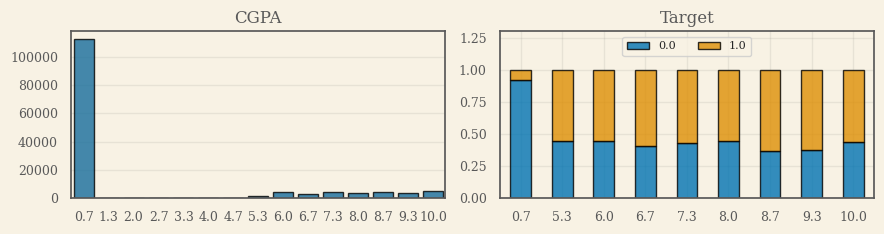

In [29]:
num_plot(train1, num_features, target)

## <div style="text-align:center;padding:10px;color:DarkGoldenrod;font-size:32px;font-family:Roboto Condensed;background-color:Seashell;margin:0;overflow:hidden;border:2px solid DarkGoldenrod;border-radius:5px;">05 - Feature - Correlation</div>

In [30]:
train2 = train1.copy()
test2 = test1.copy()

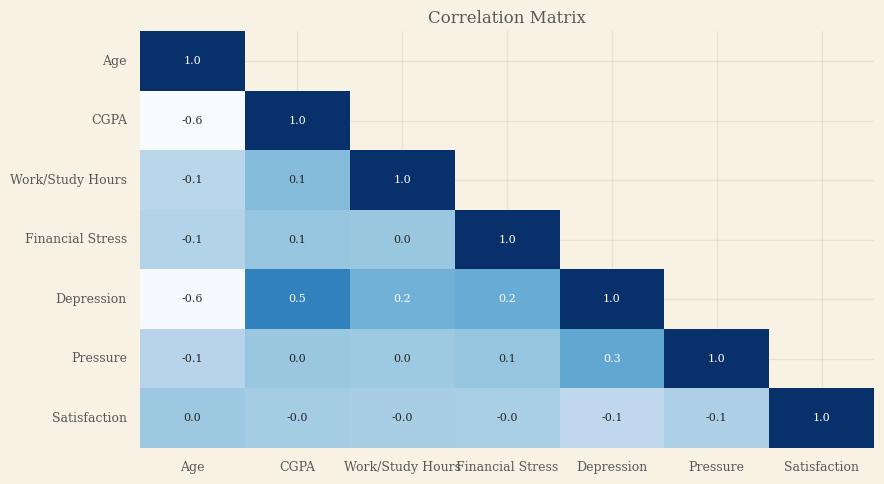

In [31]:
correlation_matrix = train2.select_dtypes(include=['number']).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
plt.figure(figsize=(9, 5))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".1f", cmap='Blues', cbar=False, annot_kws={"size": 8})
plt.xticks(rotation=0)
plt.tick_params(labelsize=9)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [32]:
def pair_plot(train, feature1, feature2, target):
    fig, axes = plt.subplots(figsize=(6, 3))
    sns.scatterplot(data=train, x=feature1, y=feature2, hue=target, palette=palette, edgecolor='black', alpha=0.8)
    axes.set_title(f'{feature1} vs {feature2}')
    axes.set_xlabel(feature1), axes.set_ylabel(feature2)
    axes.legend(fontsize=8)

    plt.tight_layout()
    plt.show()

In [33]:
correlation = train2.select_dtypes(include=['number']).corr()[target].abs().sort_values(ascending=False)
correlation.head(20).drop(target)

Age                 0.564671
CGPA                0.511933
Pressure            0.263431
Financial Stress    0.227227
Work/Study Hours    0.191746
Satisfaction        0.142439
Name: Depression, dtype: float64

## <div style="text-align:center;padding:10px;color:DarkGoldenrod;font-size:32px;font-family:Roboto Condensed;background-color:Seashell;margin:0;overflow:hidden;border:2px solid DarkGoldenrod;border-radius:5px;">06 - Feature - Engineering</div>

In [34]:
train2 = train1.copy()
test2 = test1.copy()

df = pd.concat([train2, test2], axis=0)

In [35]:
correlation_matrix = train2.select_dtypes(include=['number']).drop([target], axis=1).corr().abs()

upper_triangle_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

upper_triangle_matrix.unstack().sort_values(ascending=False).dropna().head(10)

CGPA              Age                 0.571876
Work/Study Hours  Age                 0.118356
                  CGPA                0.114315
Pressure          Age                 0.099984
Financial Stress  Age                 0.083569
                  CGPA                0.052417
Pressure          Financial Stress    0.051850
Satisfaction      Pressure            0.051523
Pressure          CGPA                0.037534
Satisfaction      Financial Stress    0.036540
dtype: float64

In [36]:
def new_preprocess(df):

    df['Score'] = df['Pressure'] + df['Financial Stress'] + 6 - df['Satisfaction']

    return df
    
df = new_preprocess(df)

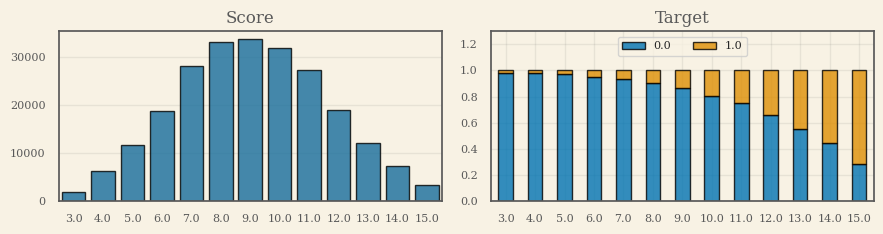

In [37]:
new_features = ['Score']
cat_plot(df, new_features, target)

In [38]:
# aggregation

agg_features = {
    'Financial Stress': ['mean'],
    'Pressure':  ['mean'],      
    'Satisfaction': ['mean'],
    'Score': ['mean']
}

df_agg = df.groupby(['City', 'Profession', 'Gender']).agg(agg_features).reset_index()

df_agg.columns = ['_'.join(col).strip() if isinstance(col, tuple) and col[1] else col[0] for col in df_agg.columns]

df = df.merge(df_agg, on=['City', 'Profession', 'Gender'], how='left')

df['Count1'] = df.groupby(['City', 'Profession', 'Gender'])['City'].transform('count')

In [39]:
def new_preprocess(df):
    
    df['x2'] = df['Degree'].str[0]

    df['x3'] = df['Pressure'] - df['Pressure_mean']

    df['x4'] = df['Financial Stress'] - df['Financial Stress_mean']

    df['x5'] = df['Satisfaction_mean'] - df['Satisfaction']

    df['x6'] = df['Score_mean'] - df['Score']
    
    return df

df = new_preprocess(df)

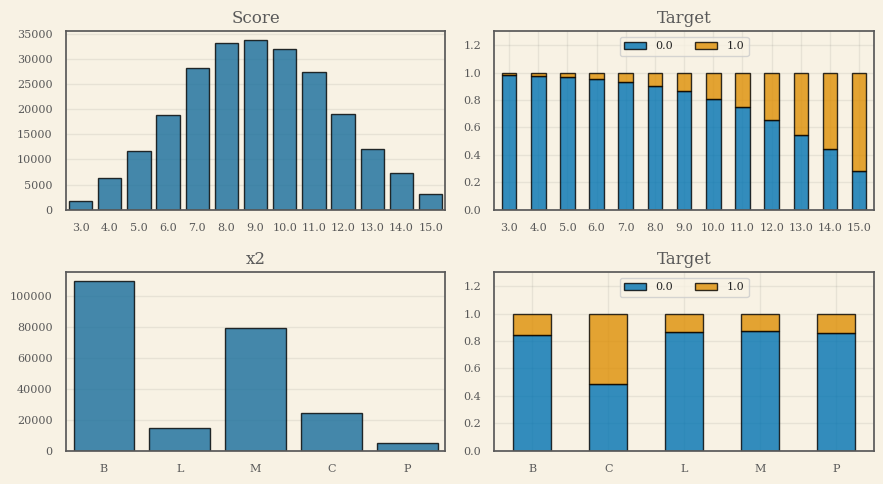

In [40]:
new_features = ['Score', 'x2']
cat_plot(df, new_features, target)

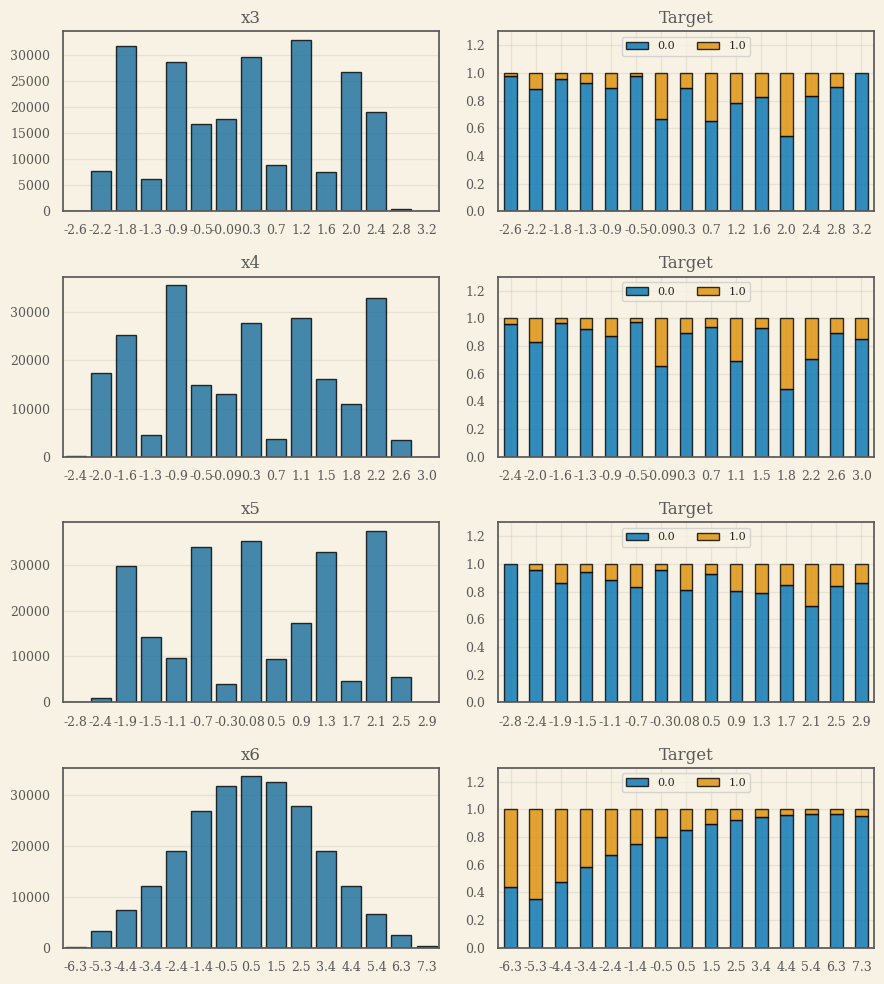

In [41]:
new_features = ['x3', 'x4', 'x5', 'x6']
num_plot(df, new_features, target)

In [42]:
# encoder

object_columns = df.select_dtypes(include='object').columns

label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [43]:
#df = pd.concat([train2, test2], axis=0)

#columns_to_drop = ['']
#df = df.drop(columns=columns_to_drop)

cat_features = df.columns[df.nunique() <= 100].drop([target]).tolist()
#df = pd.get_dummies(df, columns=cat_features, drop_first=True)

x = df.iloc[:len(train2)].drop([target], axis=1)
y = df.iloc[:len(train2)][target]
x_test = df.iloc[len(train2):].drop([target], axis=1)

print('x', x.shape)
print('y', y.shape)
print('x_test', x_test.shape)

x (140700, 26)
y (140700,)
x_test (93800, 26)


In [44]:
n = 5

kfold = StratifiedKFold(n_splits= n, shuffle=True, random_state=42)

folds = []
for train_idx, valid_idx in kfold.split(x, y):
    x_train, x_valid, y_train, y_valid = x.iloc[train_idx], x.iloc[valid_idx], y.iloc[train_idx], y.iloc[valid_idx]
    folds.append((x_train, x_valid, y_train, y_valid))

print('x_train', x_train.shape)
print('x_valid', x_valid.shape)
print('y_train', y_train.shape)
print('y_valid', y_valid.shape)

x_train (112560, 26)
x_valid (28140, 26)
y_train (112560,)
y_valid (28140,)


In [45]:
summary(x_train).sort_values(by='Unique', ascending=True).style.format(
    precision=1).background_gradient(cmap='Oranges').set_table_styles(styles)

Shape: (112560, 26)


,Type,Mean,Unique,Null,Skew,<6IQR,<3IQR,>3IQR,>6IQR,Min,Median,Max
Gender,int64,0.6,2,0,-0.2,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Suicide,int64,0.5,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Mental History,int64,0.5,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Dietary Habits,int64,1.0,3,0,-0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
Sleep Duration,int64,1.5,4,0,-0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
Pressure,float64,3.0,5,0,-0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0
Financial Stress,float64,3.0,5,0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0
Satisfaction,float64,3.0,5,0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0
x2,int64,1.3,5,0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,4.0
Score,float64,9.0,13,0,0.0,0.0,0.0,0.0,0.0,3.0,9.0,15.0


## <div style="text-align:center;padding:10px;color:DarkGoldenrod;font-size:32px;font-family:Roboto Condensed;background-color:Seashell;margin:0;overflow:hidden;border:2px solid DarkGoldenrod;border-radius:5px;">07 - Model - LightGBM</div>

In [46]:
'''
def objective(trial):
    param = {
        #'learning_rate': 0.02,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, step=0.005),
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.1, 1, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.1, 1, log=True),
        'min_split_gain': trial.suggest_float('min_split_gain', 0.1, 1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 4, 64),
        'min_child_samples': trial.suggest_int('min_child_samples', 4, 64),
        'subsample': trial.suggest_float('subsample', 0.4, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1),
    }
    metrics, iterations = [], []
    for x_train, x_valid, y_train, y_valid in folds:
        model = LGBMClassifier(
            **param,
            device_type='gpu',
            n_estimators=3000, objective='binary', random_state=42, verbose=-1)

        model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], eval_metric='accuracy',
            categorical_feature=cat_features, callbacks=[early_stopping(stopping_rounds=100, verbose=0)])
        y_pred = model.predict(x_valid)
        metrics.append(accuracy_score(y_valid, y_pred))
        iterations.append(model.best_iteration_)

    print(f'##### accuracy = {np.mean(metrics):.5f}, iteration = {np.mean(iterations):.0f} #####')
    return np.mean(metrics)

lgb_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
lgb_study.optimize(objective, n_trials=30)

print('-' * 10)
print(f'best accuracy: {lgb_study.best_trial.value:.5f}')
print(f'best_param = {lgb_study.best_trial.params}')
'''

"\ndef objective(trial):\n    param = {\n        #'learning_rate': 0.02,\n        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, step=0.005),\n        'max_depth': trial.suggest_int('max_depth', 2, 20),\n        'lambda_l1': trial.suggest_float('lambda_l1', 0.1, 1, log=True),\n        'lambda_l2': trial.suggest_float('lambda_l2', 0.1, 1, log=True),\n        'min_split_gain': trial.suggest_float('min_split_gain', 0.1, 1, log=True),\n        'num_leaves': trial.suggest_int('num_leaves', 4, 64),\n        'min_child_samples': trial.suggest_int('min_child_samples', 4, 64),\n        'subsample': trial.suggest_float('subsample', 0.4, 1),\n        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1),\n    }\n    metrics, iterations = [], []\n    for x_train, x_valid, y_train, y_valid in folds:\n        model = LGBMClassifier(\n            **param,\n            device_type='gpu',\n            n_estimators=3000, objective='binary', random_state=42, verbose=-1)\n\

In [47]:
best_param = {'learning_rate': 0.03, 'max_depth': 10, 'lambda_l1': 0.7409497433963943, 'lambda_l2': 0.11832868671725028, 
              'min_split_gain': 0.7816006162295348, 'num_leaves': 18, 
              'min_child_samples': 61, 'subsample': 0.7643105644199353, 'colsample_bytree': 0.4054143144499766}

acc, auc, iter, cm, imp, lgb_valid = [], [], [], [], [], []
y_test_proba = np.zeros(x_test.shape[0])

for i, (x_train, x_valid, y_train, y_valid) in enumerate(folds):

    model = LGBMClassifier(
            **best_param,
            device_type='gpu',
            n_estimators=3000, objective='binary', random_state=42, verbose=-1)
    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], eval_metric='accuracy',
        categorical_feature=cat_features, callbacks=[early_stopping(stopping_rounds=100, verbose=0)])

    y_valid_proba = model.predict_proba(x_valid)[:, 1]
    y_valid_pred = model.predict(x_valid)
    iteration = model.best_iteration_

    acc.append(accuracy_score(y_valid, y_valid_pred))
    auc.append(roc_auc_score(y_valid, y_valid_proba))
    iter.append(iteration)
    cm.append(confusion_matrix(y_valid, y_valid_pred))
    imp.append(model.feature_importances_)
    lgb_valid.append(y_valid_proba)

    y_test_proba += model.predict_proba(x_test)[:, 1] / kfold.n_splits

    print(f'Fold {i+1}: accuracy: {acc[-1]:.5f}, auc: {auc[-1]:.5f}, best_iter: {iter[-1]}')

lgb_proba = y_test_proba
lgb_cm = np.sum(cm, axis=0).astype(int)

idx = np.argsort(np.mean(imp, axis=0))[::-1]
lgb_imp = np.mean(imp, axis=0)[idx][:20]
lgb_col = x_train.columns[idx][:20]

print('---')
print(f'Average Accuracy: {np.mean(acc):.5f}')
print(f'Average AUC: {np.mean(auc):.5f}')

Fold 1: accuracy: 0.94176, auc: 0.97579, best_iter: 542
Fold 2: accuracy: 0.93795, auc: 0.97408, best_iter: 526
Fold 3: accuracy: 0.93980, auc: 0.97552, best_iter: 788
Fold 4: accuracy: 0.94072, auc: 0.97698, best_iter: 673
Fold 5: accuracy: 0.93977, auc: 0.97558, best_iter: 666
---
Average Accuracy: 0.94000
Average AUC: 0.97559


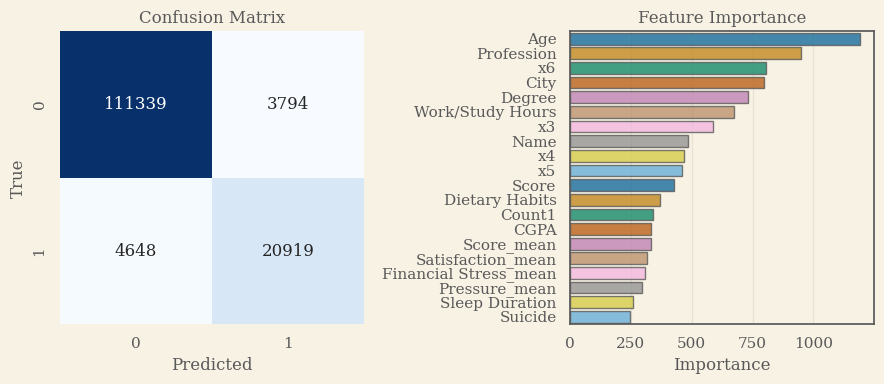

In [48]:
sub[target] = (lgb_proba >= 0.5).astype(int)

sub.to_csv('lgb.csv', index=False)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.heatmap(lgb_cm, ax=axes[0], annot=True, fmt='d', cmap='Blues', cbar=False)
axes[0].set_title('Confusion Matrix'); axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('True')

sns.barplot(x=lgb_imp, y=lgb_col, ax=axes[1], orient='h', palette=palette, edgecolor='#595959', alpha=0.8)
axes[1].set_title('Feature Importance'); axes[1].set_xlabel('Importance'); axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## <div style="text-align:center;padding:10px;color:DarkGoldenrod;font-size:32px;font-family:Roboto Condensed;background-color:Seashell;margin:0;overflow:hidden;border:2px solid DarkGoldenrod;border-radius:5px;">08 - Model - XGBoost</div>

In [49]:
'''
def objective(trial):
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, step=0.005),
        'max_depth': trial.suggest_int('max_depth', 2, 20),

        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'min_split_loss': trial.suggest_float('min_split_loss', 0, 1),
        'max_delta_step': trial.suggest_float('max_delta_step', 0, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),

        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1),
}
    metrics, iterations = [], []
    for x_train, x_valid, y_train, y_valid in folds:
        model = XGBClassifier(
            **param,
            tree_method='gpu_hist',
            n_estimators=3000, objective='binary:logistic', eval_metric='error',
            random_state=42, early_stopping_rounds=100)

        model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)], verbose=0)
        y_pred = model.predict(x_valid)
        metrics.append(accuracy_score(y_valid, y_pred))
        iterations.append(model.best_iteration)

    print(f'##### accuracy = {np.mean(metrics):.5f}, iteration = {np.mean(iterations):.0f} #####')
    return np.mean(metrics)

xgb_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
xgb_study.optimize(objective, n_trials=50)

print('-' * 10)
print(f'best accuracy: {xgb_study.best_trial.value:.5f}')
print(f'best_param = {xgb_study.best_trial.params}')
'''

"\ndef objective(trial):\n    param = {\n        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, step=0.005),\n        'max_depth': trial.suggest_int('max_depth', 2, 20),\n\n        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),\n        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),\n        'min_split_loss': trial.suggest_float('min_split_loss', 0, 1),\n        'max_delta_step': trial.suggest_float('max_delta_step', 0, 1),\n        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),\n\n        'subsample': trial.suggest_float('subsample', 0.1, 1),\n        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),\n        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1),\n        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1),\n}\n    metrics, iterations = [], []\n    for x_train, x_valid, y_train, y_valid in folds:\n        model = XGBClassifier(\n            **param,\n            tree_

In [50]:
best_param = {'learning_rate': 0.06999999999999999, 'max_depth': 7, 'reg_alpha': 0.37027572833614, 
              'reg_lambda': 0.0335858849344719, 'min_split_loss': 0.34853194462104553, 'max_delta_step': 0.9960165317474354, 
              'min_child_weight': 7, 'subsample': 0.7005210494307716, 'colsample_bytree': 0.10230041464550127, 
              'colsample_bylevel': 0.3677927068184836, 'colsample_bynode': 0.40856927441357027}

acc, auc, cm, iter, imp, xgb_valid = [], [], [], [], [], []
y_test_proba = np.zeros(x_test.shape[0])
for i, (x_train, x_valid, y_train, y_valid) in enumerate(folds):

    model = XGBClassifier(
        **best_param,
        tree_method='gpu_hist',
        n_estimators=3000, objective='binary:logistic', eval_metric='error', random_state=42, early_stopping_rounds=100)

    model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)], verbose=0)

    y_valid_proba = model.predict_proba(x_valid)[:, 1]
    y_valid_pred = model.predict(x_valid)
    iteration = model.best_iteration

    acc.append(accuracy_score(y_valid, y_valid_pred))
    auc.append(roc_auc_score(y_valid, y_valid_proba))
    iter.append(iteration)
    cm.append(confusion_matrix(y_valid, y_valid_pred))
    imp.append(model.feature_importances_)
    xgb_valid.append(y_valid_proba)

    y_test_proba += model.predict_proba(x_test)[:, 1] / kfold.n_splits

    print(f'Fold {i+1}: accuracy: {acc[-1]:.5f}, auc: {auc[-1]:.5f}, best_iter: {iter[-1]}')

xgb_proba = y_test_proba
xgb_cm = np.sum(cm, axis=0).astype(int)

idx = np.argsort(np.mean(imp, axis=0))[::-1]
xgb_imp = np.mean(imp, axis=0)[idx][:20]
xgb_col = x_train.columns[idx][:20]

print('---')
print(f'Average Accuracy: {np.mean(acc):.5f}')
print(f'Average AUC: {np.mean(auc):.5f}')

Fold 1: accuracy: 0.94026, auc: 0.97545, best_iter: 661
Fold 2: accuracy: 0.93913, auc: 0.97389, best_iter: 931
Fold 3: accuracy: 0.94083, auc: 0.97524, best_iter: 677
Fold 4: accuracy: 0.94158, auc: 0.97698, best_iter: 658
Fold 5: accuracy: 0.93969, auc: 0.97498, best_iter: 727
---
Average Accuracy: 0.94030
Average AUC: 0.97531


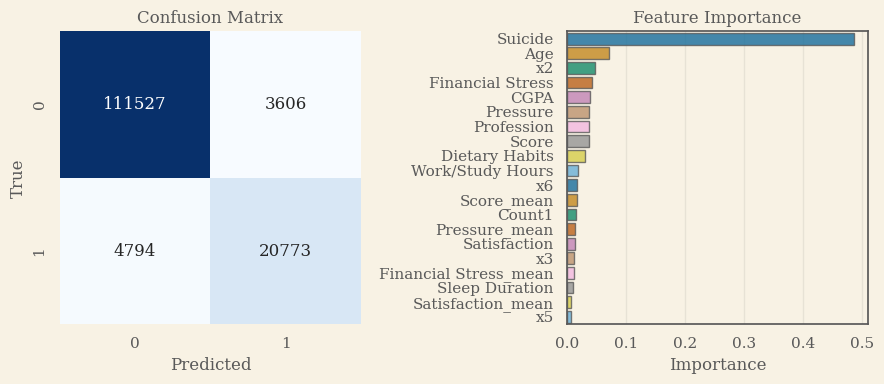

In [51]:
sub[target] = (xgb_proba >= 0.5).astype(int)

sub.to_csv('xgb.csv', index=False)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.heatmap(xgb_cm, ax=axes[0], annot=True, fmt='d', cmap='Blues', cbar=False)
axes[0].set_title('Confusion Matrix'); axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('True')

sns.barplot(x=xgb_imp, y=xgb_col, ax=axes[1], orient='h', palette=palette, edgecolor='#595959', alpha=0.8)
axes[1].set_title('Feature Importance'); axes[1].set_xlabel('Importance'); axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## <div style="text-align:center;padding:10px;color:DarkGoldenrod;font-size:32px;font-family:Roboto Condensed;background-color:Seashell;margin:0;overflow:hidden;border:2px solid DarkGoldenrod;border-radius:5px;">09 - Model - CatBoost</div>

In [52]:
'''
def objective(trial):
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, step=0.005),
        'depth': trial.suggest_int('depth', 2, 10),

        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 2, 20),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 4, 64),

        'random_strength': trial.suggest_float('random_strength', 0, 1),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),

        'border_count': trial.suggest_int('border_count', 64, 255),
        }

    metrics, iterations = [], []
    for x_train, x_valid, y_train, y_valid in folds:
        model = CatBoostClassifier(
            **param,
            task_type='GPU',
            iterations=1000, objective='Logloss', eval_metric='Accuracy', random_seed=42, verbose=0)
        model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=100)

        y_pred = model.predict(x_valid)
        metrics.append(accuracy_score(y_valid, y_pred))
        iterations.append(model.best_iteration_)

    print(f'##### accuracy = {np.mean(metrics):.5f}, iteration = {np.mean(iterations):.0f} #####')
    return np.mean(metrics)

cb_study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
cb_study.optimize(objective, n_trials=30)

print('-' * 10)
print(f'best accuracy: {cb_study.best_trial.value:.5f}')
print(f'best_param = {cb_study.best_trial.params}')
'''

"\ndef objective(trial):\n    param = {\n        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, step=0.005),\n        'depth': trial.suggest_int('depth', 2, 10),\n\n        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 2, 20),\n        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 4, 64),\n\n        'random_strength': trial.suggest_float('random_strength', 0, 1),\n        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),\n\n        'border_count': trial.suggest_int('border_count', 64, 255),\n        }\n\n    metrics, iterations = [], []\n    for x_train, x_valid, y_train, y_valid in folds:\n        model = CatBoostClassifier(\n            **param,\n            task_type='GPU',\n            iterations=1000, objective='Logloss', eval_metric='Accuracy', random_seed=42, verbose=0)\n        model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=100)\n\n        y_pred = model.predict(x_valid)\n        metrics.ap

In [53]:
best_param = {'learning_rate': 0.08, 'depth': 7, 'l2_leaf_reg': 10, 'min_data_in_leaf': 24, 
              'random_strength': 0.5505694458003194, 'bagging_temperature': 0.006498208018538398, 'border_count': 190}

acc, auc, cm, iter, imp, cb_valid = [], [], [], [], [], []
y_test_proba = np.zeros(x_test.shape[0])

for i, (x_train, x_valid, y_train, y_valid) in enumerate(folds):
    model = CatBoostClassifier(
        **best_param,
        task_type='GPU',
        iterations=1000,objective='Logloss',eval_metric='Accuracy',random_seed=42,early_stopping_rounds=100,verbose=0)

    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=100)

    y_valid_proba = model.predict_proba(x_valid)[:, 1]
    y_valid_pred = model.predict(x_valid)
    iteration = model.best_iteration_

    acc.append(accuracy_score(y_valid, y_valid_pred))
    auc.append(roc_auc_score(y_valid, y_valid_proba))
    iter.append(iteration)
    cm.append(confusion_matrix(y_valid, y_valid_pred))
    imp.append(model.feature_importances_)
    cb_valid.append(y_valid_proba)

    y_test_proba += model.predict_proba(x_test)[:, 1] / kfold.n_splits

    print(f'Fold {i+1}: accuracy: {acc[-1]:.5f}, auc: {auc[-1]:.5f}, best_iter: {iter[-1]}')

cb_proba = y_test_proba
cb_cm = np.sum(cm, axis=0).astype(int)

idx = np.argsort(np.mean(imp, axis=0))[::-1]
cb_imp = np.mean(imp, axis=0)[idx][:20]
cb_col = x_train.columns[idx][:20]

print('---')
print(f'Average Accuracy: {np.mean(acc):.5f}')
print(f'Average AUC: {np.mean(auc):.5f}')

Fold 1: accuracy: 0.93927, auc: 0.97519, best_iter: 267
Fold 2: accuracy: 0.93831, auc: 0.97335, best_iter: 194
Fold 3: accuracy: 0.94087, auc: 0.97529, best_iter: 163
Fold 4: accuracy: 0.94190, auc: 0.97699, best_iter: 315
Fold 5: accuracy: 0.94041, auc: 0.97507, best_iter: 324
---
Average Accuracy: 0.94015
Average AUC: 0.97518


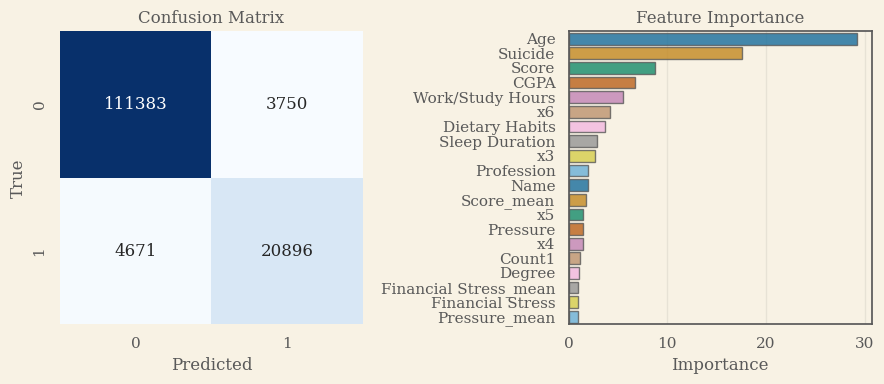

In [54]:
sub[target] = (cb_proba >= 0.5).astype(int)

sub.to_csv('cb.csv', index=False)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.heatmap(cb_cm, ax=axes[0], annot=True, fmt='d', cmap='Blues', cbar=False)
axes[0].set_title('Confusion Matrix'); axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('True')

sns.barplot(x=cb_imp, y=cb_col, ax=axes[1], orient='h', palette=palette, edgecolor='#595959', alpha=0.8)
axes[1].set_title('Feature Importance'); axes[1].set_xlabel('Importance'); axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## <div style="text-align:center;padding:10px;color:DarkGoldenrod;font-size:32px;font-family:Roboto Condensed;background-color:Seashell;margin:0;overflow:hidden;border:2px solid DarkGoldenrod;border-radius:5px;">10 - Final Prediction</div>

In [55]:
accuracy_folds = []

for i, (x_train, x_valid, y_train, y_valid) in enumerate(folds):

    valid_fold = (
        np.array(lgb_valid[i])
        + np.array(xgb_valid[i])
        + np.array(cb_valid[i])
                ) / 3

    valid_pred = (valid_fold >= 0.5).astype(int)
    acc_fold = accuracy_score(y_valid, valid_pred)
    accuracy_folds.append(acc_fold)

round(np.mean(accuracy_folds),5)

0.94029

In [56]:
average_proba = (
    lgb_proba
    + xgb_proba
    + cb_proba
            ) / 3

sub[target] = (average_proba >= 0.5).astype(int)

sub.to_csv("submission.csv",index=False)

In [57]:
accuracy_folds = []

for i, (x_train, x_valid, y_train, y_valid) in enumerate(folds):

    valid_fold = np.vstack([
        (lgb_valid[i] >= 0.5).astype(int),
        (xgb_valid[i] >= 0.5).astype(int),
        (cb_valid[i] >= 0.5).astype(int)
    ])

    valid_pred = (np.sum(valid_fold, axis=0) > (valid_fold.shape[0] / 2)).astype(int)

    acc_fold = accuracy_score(y_valid, valid_pred)
    accuracy_folds.append(acc_fold)

round(np.mean(accuracy_folds), 5)

0.94056

In [58]:
lgb_pred = (lgb_proba >= 0.5).astype(int)
xgb_pred = (xgb_proba >= 0.5).astype(int)
cb_pred = (cb_proba >= 0.5).astype(int)

all_preds = np.vstack([lgb_pred, xgb_pred, cb_pred])
final_pred = (np.sum(all_preds, axis=0) > (all_preds.shape[0] / 2)).astype(int)

sub[target] = final_pred
sub.to_csv("submission.csv", index=False)

<div style="text-align:center;padding:20px;color:Seashell;font-size:48px;font-family:Roboto Condensed;background-color:DarkGoldenrod;margin:0;overflow:hidden;border:4px solid Seashell;border-radius:10px;"></div>